In [1]:
#Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

Questions: 

1. Try these things to understand data in more details

2. How many articles are there for Palestine and Microsoft each?

3. What is hour of publication for each article.

4. How many articles are there, where status of all social media platform is greater than zero? How many Microsoft and how many are Palestine.

5. How sentimentTitle and Sentiment headings are spread?

6. Try to summarize to article and headlines. (We'll discuss this in details in this week)

7. For each topic (microsoft and palestine), how many news article are present in their individual social media platform file. 

8. How are the data spread in separate file for each social media platform file for articles with Facebook/Googleplus/Linkedin values are -1.

9. How are the data spread in separate file for each social media platform file for articles with Facebook/Googleplus/Linkedin values are -1.

10. What meaning is coming out of Facebook/Googleplus/Linkedin columns with columns -1 and 0

In [2]:
df = pd.read_csv('News_Final.csv')

In [3]:
df.shape

(93239, 11)

In [4]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


#### EDA

In [5]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [6]:
df['Source'].value_counts()

Bloomberg                                1732
Reuters                                  1321
ABC News                                 1098
New York Times                            992
The Guardian                              933
Business Insider                          884
Economic Times                            787
Forbes                                    781
Washington Post                           774
CNN                                       742
Wall Street Journal                       730
WinBeta                                   707
CNBC                                      682
Huffington Post                           676
Breitbart News                            605
Reuters via Yahoo! Finance                551
The Hill                                  548
Financial Times                           544
USA TODAY                                 530
ZDNet                                     526
MSPoweruser.com                           516
Daily Mail                        

#### Drop the rows containing Obama and Economy as per objective we need only Microsoft and Palestine 

In [7]:
df = df.drop(df[df.Topic == 'obama'].index)

In [8]:
df = df.drop(df[df.Topic == 'economy'].index)

In [9]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
5,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1
9,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1
10,27813.0,Microsoft Project Centennial seen with “univer...,"Microsoft may have burned off one bridge, but ...",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1


In [10]:
df.shape

(30701, 11)

In [11]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline               4
Source               239
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

#### Fill the Null values 

In [12]:
df.Source.fillna(df.Source.mode()[0],inplace = True) #Replace the null values of the Source with the mode 

In [13]:
df.isnull().sum()

IDLink               0
Title                0
Headline             4
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30701 entries, 5 to 93238
Data columns (total 11 columns):
IDLink               30701 non-null float64
Title                30701 non-null object
Headline             30697 non-null object
Source               30701 non-null object
Topic                30701 non-null object
PublishDate          30701 non-null object
SentimentTitle       30701 non-null float64
SentimentHeadline    30701 non-null float64
Facebook             30701 non-null int64
GooglePlus           30701 non-null int64
LinkedIn             30701 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IDLink,30701.0,45494.048956,28776.617920,101.000000,20624.000000,44464.000000,66312.000000,104800.000000
SentimentTitle,30701.0,-0.004106,0.124850,-0.950694,-0.068041,0.000000,0.061688,0.714610
SentimentHeadline,30701.0,-0.023311,0.136808,-0.732337,-0.108333,-0.024098,0.060634,0.964646
Facebook,30701.0,36.069802,307.743616,-1.000000,0.000000,2.000000,14.000000,22346.000000
GooglePlus,30701.0,3.714244,20.281858,-1.000000,0.000000,0.000000,2.000000,1016.000000
LinkedIn,30701.0,24.650598,246.597801,-1.000000,0.000000,0.000000,5.000000,20341.000000


In [16]:
df['Topic'].value_counts()

microsoft    21858
palestine     8843
Name: Topic, dtype: int64

In [17]:
max_sen_title = df.groupby(['Title','SentimentTitle'], as_index=False).max()  

#### High to Low SentimentTitle score based on Source

In [18]:
df[['Source','SentimentTitle']].groupby('Source').agg('median').sort_values(by='SentimentTitle',ascending=False).head()

,SentimentTitle
Source,
Yahoo Tech via Yahoo! News,0.714610
Focus News,0.500000
ChinaTopix,0.474342
Mensquare,0.395292
4k,0.376889


In [19]:
df[['Topic','SentimentTitle','SentimentHeadline']].groupby('Topic').agg('mean').sort_values(by='SentimentTitle',ascending=False)

,SentimentTitle,SentimentHeadline
Topic,,
microsoft,0.002359,-0.014744
palestine,-0.020085,-0.044485


#### Convert Published Date to Datetime

In [20]:
df['Date'] = pd.to_datetime(df['PublishDate'])

In [21]:
df['Date'].min(),df['Date'].max()

(Timestamp('2015-03-01 00:19:00'), Timestamp('2016-07-07 16:16:11'))

In [22]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Date
5,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1,2015-03-01 00:19:00
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",WinBeta,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0,2016-02-28 14:03:00
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1,2015-03-01 01:20:00
9,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1,2015-03-01 01:32:00
10,27813.0,Microsoft Project Centennial seen with “univer...,"Microsoft may have burned off one bridge, but ...",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1,2015-03-01 02:14:00


In [23]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
df['month_name'] = df['Date'].dt.strftime('%b')
df['weekday'] = df['Date'].dt.strftime('%A')

In [24]:
df['D_T_Y'] = df.Date.map(lambda x: x.strftime('%Y-%m-%d'))

In [25]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,Date,month,day,year,month_name,weekday,D_T_Y
5,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1,2015-03-01 00:19:00,3,1,2015,Mar,Sunday,2015-03-01
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",WinBeta,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0,2016-02-28 14:03:00,2,28,2016,Feb,Sunday,2016-02-28
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1,2015-03-01 01:20:00,3,1,2015,Mar,Sunday,2015-03-01
9,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1,2015-03-01 01:32:00,3,1,2015,Mar,Sunday,2015-03-01
10,27813.0,Microsoft Project Centennial seen with “univer...,"Microsoft may have burned off one bridge, but ...",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1,2015-03-01 02:14:00,3,1,2015,Mar,Sunday,2015-03-01


In [26]:
df.shape

(30701, 18)

In [27]:
df.day

5         1
6        28
8         1
9         1
10        1
11        1
14        1
15        1
16        1
17        1
20        1
27        1
30        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
45        1
46        1
47        1
48        1
49        1
50        1
51        1
52        1
         ..
93161     7
93165     7
93167     7
93174     7
93175     7
93176     7
93177     7
93179     7
93180     7
93181     7
93182     7
93183     7
93185     7
93188     7
93191     7
93198     7
93199     7
93200     7
93202     7
93206     7
93209     7
93211     7
93213     7
93222     7
93224     7
93229     7
93233     7
93236     7
93237     7
93238     7
Name: day, Length: 30701, dtype: int64

#### Monday is having the Highest number of News Published

In [28]:
df.weekday.value_counts()

Monday       5672
Tuesday      5638
Wednesday    5421
Thursday     5127
Friday       4287
Sunday       2322
Saturday     2234
Name: weekday, dtype: int64

#### March is having the Highest number of News Published, while it is coming 2 times in 2015 and 2016. 

In [29]:
df.month_name.value_counts()

Mar    4283
Jan    4211
Dec    3857
May    3678
Jun    3639
Apr    3598
Feb    3511
Nov    3021
Jul     680
Oct     219
Sep       3
Aug       1
Name: month_name, dtype: int64

#### News published based on Month and Topic 

In [30]:
df[['month_name','Topic','IDLink']].groupby(['month_name','Topic']).agg('count').sort_values(by='IDLink',ascending=False)

,,IDLink
month_name,Topic,
Mar,microsoft,3028
Jan,microsoft,2864
May,microsoft,2719
Jun,microsoft,2703
Dec,microsoft,2664
Apr,microsoft,2609
Feb,microsoft,2396
Nov,microsoft,2259
Jan,palestine,1347


In [31]:
df['GooglePlus'].value_counts().head()

 0    15928
 1     3590
-1     2690
 2     1980
 3     1257
Name: GooglePlus, dtype: int64

In [32]:
df['LinkedIn'].value_counts().head()

 0    15360
-1     2690
 1     2295
 2     1140
 3      778
Name: LinkedIn, dtype: int64

In [33]:
df['Facebook'].value_counts().head()

 0    6390
-1    5037
 1    2260
 2    1667
 3    1330
Name: Facebook, dtype: int64

#### Making of wordCloud from Title

In [34]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['Palestinian','Palestine','Microsoft'])

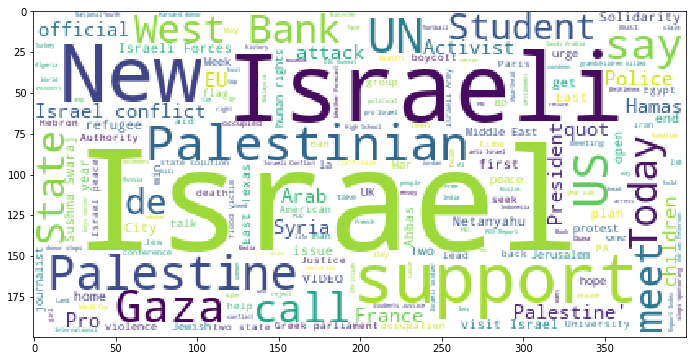

In [35]:
import nltk
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='palestine'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

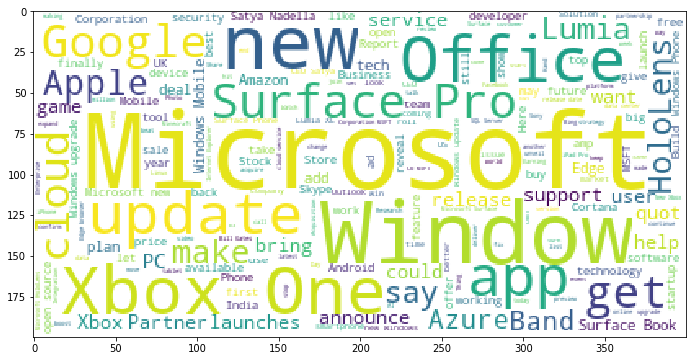

In [36]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='microsoft'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

#### Making the WordCloud of Headlines 

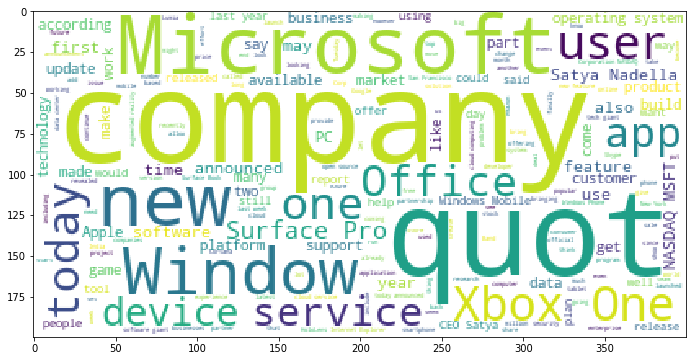

In [37]:
plt.figure(figsize=(12,6))
Headline = df.Headline[df['Topic']=='microsoft']
values = ','.join(map(str,Headline)) #Doing this step, otherwise it is giving the error 
wc = WordCloud(background_color='white',stopwords=stopwords).generate(values)
plt.imshow(wc)

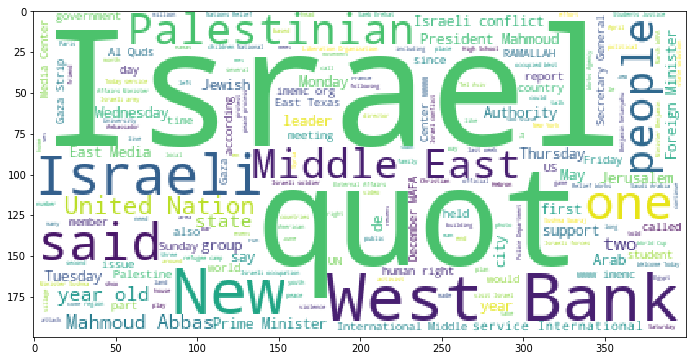

In [38]:
plt.figure(figsize=(12,6))
Headline = df.Headline[df['Topic']=='palestine']
values = ','.join(map(str,Headline)) #Doing this step, otherwise it is giving the error
wc = WordCloud(background_color='white',stopwords=stopwords).generate(values)
plt.imshow(wc)

#### Text Cleaning 

In [39]:
df.Headline = df.Headline.astype('str')

In [40]:
docs = df['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
#stopwords.extend(['amp','rt'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

5      attende expect see latest version microsoft d...
6     ramallah februari   wafa  palestin liber organ...
8     hancock counti man lost barn earli monday morn...
9     new delhi feb  technolog giant microsoft targe...
10    microsoft may burn one bridg still build diffe...
Name: Headline, dtype: object

In [41]:
df.dtypes

IDLink                      float64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate                  object
SentimentTitle              float64
SentimentHeadline           float64
Facebook                      int64
GooglePlus                    int64
LinkedIn                      int64
Date                 datetime64[ns]
month                         int64
day                           int64
year                          int64
month_name                   object
weekday                      object
D_T_Y                        object
dtype: object

#### Document Term Matrix 

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm 

<30701x24059 sparse matrix of type '<class 'numpy.int64'>'
	with 464795 stored elements in Compressed Sparse Row format>

In [43]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names())
df_dtm

MemoryError: 

#### Creating Bag of words analysis combined 

In [ ]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(color='steelblue',figsize=(12,5))

#### Creating Bag of Words seperately of Microsoft and Palestine 

In [ ]:
ndf1 = df[df['Topic']=='palestine']

In [ ]:
ndf2 = df[df['Topic']=='microsoft']

#### Palestine 

In [ ]:
ndf1.Headline = ndf1.Headline.astype('str')

In [ ]:
docs = ndf1['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['palestine','palestinian'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm 

In [ ]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names())
df_dtm

In [ ]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(color='steelblue',figsize=(12,5))

#### Microsoft 

In [ ]:
ndf2.Headline = ndf2.Headline.astype('str')

In [ ]:
docs = ndf2['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['microsoft'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm 

In [ ]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names())
df_dtm

In [ ]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(color='steelblue',figsize=(12,5))

#### Ques1. How many articles are for Palestine and Microsoft each?

In [ ]:
df.Topic.value_counts()

#### Ques2. What is our of publication of each article? 

In [ ]:
df['Date'] = pd.to_datetime(df['PublishDate'])

In [ ]:
def hr_func(ts): 
    return ts.hour

df['time_hour'] = df['Date'].apply(hr_func)

In [ ]:
df.head()

#### Ques3. How many articles are there, where status of all social media platform is greater than zero? How many Microsoft and how many are Palestine.

In [ ]:
GT0 = df.loc[((df.Facebook>0) & (df.LinkedIn>0) & (df.GooglePlus>0)),:]

In [ ]:
GT0

In [ ]:
GT0P = GT0[GT0['Topic']=='palestine']

In [ ]:
GT0P.Facebook.value_counts().sum()

In [ ]:
GT0M = GT0[GT0['Topic']=='microsoft']

In [ ]:
GT0M.Facebook.value_counts().sum()

#### For Individual Condition 

In [ ]:
GT0f = df.loc[(df.Facebook>0),:]

In [ ]:
GT0f.Facebook.value_counts().sum()

In [ ]:
GT0g = df.loc[(df.GooglePlus>0),:]

In [ ]:
GT0g.GooglePlus.value_counts().sum()

In [ ]:
GT0l = df.loc[(df.LinkedIn>0),:]

In [ ]:
GT0l.LinkedIn.value_counts().sum()

#### Microsoft is having 7084 rows and Palestine is having 736 rows 

#### Ques4. How SentimentTitle and Sentiment Headings are spread? 

In [ ]:
df.hist(column='SentimentTitle')

In [ ]:
df.hist(column='SentimentHeadline')

#### New DataSet (Reqd. Dates) 

In [ ]:
df_new = df[(df['D_T_Y'] > '2015-11-01') & (df['D_T_Y'] < '2016-07-07')]

In [ ]:
df_new.shape

In [ ]:
df.shape

#### Topic Modelling 

In [ ]:
import gensim
import nltk

In [ ]:
df_new.head()

#### Topic Modelling for Palestine 

In [ ]:
data=df_new[df_new['Topic']=='palestine']

In [ ]:
docs=data['Title'].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs.head()

In [ ]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['use','','will','one','good'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [ ]:
dictionary = gensim.corpora.Dictionary(docs_clean)

In [ ]:
# bag of words
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [ ]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=10,random_state=500)

#### Document to Term Relationship

In [ ]:
lda_model.get_document_topics(docs_bow[1])

In [ ]:
new_df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
new_df.sort_values(by='probs').iloc[-1]['topics']

In [ ]:
new_df.sort_values(by='probs')

In [ ]:
topics=[]
for doc in docs_bow:
    new_df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=new_df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)

In [ ]:
lda_model.print_topics()

In [ ]:
# coherence
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
c_scores=[]
for i in range(4,20):
    lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=i,random_state=100,iterations=300)
    coher_model=CoherenceModel(lda_model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)

In [ ]:
plt.plot(c_scores)
plt.show()

#### Topic Modelling for Microsoft

In [ ]:
data=df_new[df_new['Topic']=='microsoft']

In [ ]:
docs=data['Title'].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs.head()

In [ ]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['use','','will','one','good'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [ ]:
dictionary = gensim.corpora.Dictionary(docs_clean)

In [ ]:
# bag of words
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [ ]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=10,random_state=500)

In [ ]:
new_df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
new_df.sort_values(by='probs').iloc[-1]['topics']

In [ ]:
topics=[]
for doc in docs_bow:
    new_df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=new_df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)
#data['topics']=topics

In [ ]:
lda_model.print_topics()

In [ ]:
# coherence
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
c_scores=[]
for i in range(4,20):
    lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=i,random_state=100,iterations=300)
    coher_model=CoherenceModel(lda_model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)

In [ ]:
plt.plot(c_scores)
plt.show()

### Regression 

In [ ]:
GT0 = df.loc[((df.Facebook>0) & (df.LinkedIn>0) & (df.GooglePlus>0)),:]

In [ ]:
GT0.head()

In [ ]:
GT0.columns

In [ ]:
X = GT0[['SentimentTitle','SentimentHeadline','Facebook','GooglePlus','LinkedIn']]
y = GT0[['SentimentHeadline']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
ypred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, ypred)  

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

### By using DTM Matrix 

In [ ]:
GT0.Topic.value_counts()

In [ ]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
stemmer = PorterStemmer()

In [ ]:
custom_stop_words = ['microsoft','palestine']
common_stop_words = nltk.corpus.stopwords.words('english')
stop_words_all = np.hstack([custom_stop_words, common_stop_words])
len(stop_words_all)

In [ ]:
docs = GT0['Headline']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]', '')
docs = docs.str.split(' ')
words_rows = docs.tolist()
words_all = []
words_rows_clean = []
docs_clean = []
for row in words_rows:
    row_words = [stemmer.stem(word) for word in row if word not in stop_words_all]  
    words_rows_clean.append(row_words)
    docs_clean.append(' '.join(row_words))
    words_all.extend(row_words)

    
model_dtm = CountVectorizer()
sparse_matrix = model_dtm.fit_transform(docs_clean)
dtm = pd.DataFrame(sparse_matrix.toarray(),
                   columns=model_dtm.get_feature_names())
dtm.shape

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(dtm, test_size=0.3, random_state=0)

train_y = GT0.iloc[train_x.index]['SentimentHeadline']
test_y = GT0.iloc[test_x.index]['SentimentHeadline']

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model=LinearRegression()
model.fit(train_x,train_y)

In [ ]:
ypred = model.predict(test_x)

In [ ]:
r2_score(test_y, ypred)  

### XG-Boost

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample

from statsmodels.api import add_constant
import statsmodels.discrete.discrete_model as smt

import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

In [ ]:
import xgboost as xgb
from scipy.stats import randint as sp_randint
xgr = xgb.XGBRegressor()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(xgr, param_distributions=param, n_iter=80)
randomCV.fit(X,y)
randomCV.best_params_

In [ ]:
xgr = xgb.XGBRegressor(n_estimators=78)
xgr.fit(x_train, y_train)

In [ ]:
xgr.score(x_test,y_test)

### TF-IDF

In [ ]:
GT0.head()

In [ ]:
GT0.Topic.value_counts()

In [ ]:
GT0 = df[(df.Facebook>0)]
GT0=GT0[GT0['Topic']=='microsoft']

In [ ]:
docs = GT0['Headline'].str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['palestine','microsoft'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)

In [ ]:
GT0.shape

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = CountVectorizer(stop_words=stopwords, ngram_range=(1,1))

document_term_matrix = tf_idf_vectorizer.fit_transform(docs_clean)

#len(tf_idf_vectorizer.get_feature_names())

document_term_matrix.toarray().shape

#pd.DataFrame(document_term_matrix.toarray(), 
             #columns = tf_idf_vectorizer.get_feature_names(), )


In [ ]:
temp = pd.DataFrame(document_term_matrix.toarray(),columns=tf_idf_vectorizer.get_feature_names())
GT0['Avg-TFIDF'] = temp.mean(axis=1)
GT0['Sum-TFIDF'] = temp.sum(axis=1)
#GT0.head()

In [ ]:
#columns_list = ['SentimentTitle','SentimentHeadline','month','day','year','time_hour','Avg-TFIDF','Sum-TFIDF']
X = temp
y = GT0['Facebook']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [ ]:
X.head()


In [ ]:
X.shape

In [ ]:
GT0[X[X['zuckerberg']==1].index]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
r2_score(y_train, model.predict(X_train))  

In [ ]:
#GT0 = GT0[GT0['Facebook']<=8000]

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

GT0['Source_Encoded'] = le.fit_transform(GT0['Source'])

In [ ]:
GT0.Source.value_counts()

In [ ]:
#GT0 = GT0[GT0.Source=='WinBeta']
#GT0.shape

In [ ]:
GT0.head()

In [ ]:
GT0.isnull().sum()
GT0.fillna(0,inplace=True)

In [ ]:
columns_list = ['SentimentTitle','SentimentHeadline','month','day','year','time_hour','Avg-TFIDF','Sum-TFIDF']
X = GT0[columns_list]
y = GT0['Facebook']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
r2_score(y_train, model.predict(X_train))  

In [ ]:
X.head()

In [ ]:
GT0 = df[(df.GooglePlus>0)]
GT0.shape

In [ ]:
columns_list = ['SentimentTitle','SentimentHeadline','month','day','year','time_hour','Avg-TFIDF','Sum-TFIDF']
X = GT0[columns_list]
y = GT0['GooglePlus']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
r2_score(y_train, model.predict(X_train))  

In [ ]:
GT0 = df[((df.Facebook>0) & (df.Facebook<8000))]

In [ ]:
docs = GT0['Title'].str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['palestine','microsoft'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)

from sklearn.model_selection import train_test_split
train, test = train_test_split(docs_clean,test_size=0.2,random_state=100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(train)
dtm_train = vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape, df_dtm_test.shape

#train_y = GT0.loc[train.index]['Facebook']
#test_y = GT0.loc[test.index]['Facebook']

In [ ]:
docs_clean.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(train)
dtm_train = vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape, df_dtm_test.shape


train_y = GT0.loc[train.index]['Facebook']
test_y = GT0.loc[test.index]['Facebook']

In [ ]:
df_dtm_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df_dtm_train,train_y)

In [ ]:
ypred = model.predict(df_dtm_test)

In [ ]:
r2_score(list(test_y), ypred)  

In [ ]:
ypred.shape

In [ ]:
metrics.r2_score(test_y,ypred)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_y, ypred)

In [ ]:
docs = GT0['Headline'].str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['palestine','microsoft'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)

from sklearn.model_selection import train_test_split
train, test = train_test_split(docs_clean,test_size=0.2,random_state=100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(train)
dtm_train = vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape, df_dtm_test.shape


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(train)
dtm_train = vectorizer.transform(train)
dtm_test = vectorizer.transform(test)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape, df_dtm_test.shape


train_y = GT0.loc[train.index]['Facebook']
test_y = GT0.loc[test.index]['Facebook']

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df_dtm_train,train_y)

In [ ]:
ypred = model.predict(df_dtm_test)

In [ ]:
r2_score(test_y, ypred)  

In [ ]:
mean_squared_error(test_y, ypred)